# Ejercicio 2

Para esta seccion, seleccionamos un corpus de la biblioteca nltk. Para este ejercicio seleccionamos el corpus **cess_es**. Este corpus consiste un texto de noticias en espanol

In [1]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from src.preprocesamiento.preprocesador import *
from src.zipf.frecuencias import *
from src.zipf.zipf_distribution import *
from src.graficacion import *
from src.preprocesamiento.subword import *

os.environ["NLTK_DATA"]="datos_nltk/"
import  nltk
from nltk.corpus import stopwords

## Paso 1
Nos aseguramos de tener disponible el corpus **cess_esp**. Aprovechamos la funcionalidad de nltk para obtener las palabras del corpus. Estas palabras funcionaran como nuestros tokens.
Notemos que el corpus tiene un total de __192686__ palabra (tokens)



In [2]:
## Seleccionamos un corpus en español que se encuentra en nltk
from nltk.corpus import cess_esp

nltk.download("cess_esp")
corpus_tokens = cess_esp.words()

print("Numero de tokens en el corpus:", len(corpus_tokens))

[nltk_data] Downloading package cess_esp to datos_nltk/...
[nltk_data]   Package cess_esp is already up-to-date!


Numero de tokens en el corpus: 192686


## Paso 2
Aplicamos un pre procesamiento a todos los tokens de nuestro corpus. Los pasos a seguir en nuestro pre procesamiento son los siguientes:
- Pasamos todos los tokens a minusculas
- Eliminamos cualquier signo de puntacion en los tokens, es decir, eliminamos cualquier signo que no sea una letra del alfabeto en español o número
- Eliminamos todos los tokens que sean identificados como _stopword_. Para la lista de _stopword_ utilizamos la lista encontrada en ntlk para el lenguaje de español
- Finalmente eliminamos acentos. En este paso, para cada token, sustituimos sus vocales acentuadas por la misma vocal sin acento.



In [3]:
# Dado nuestro corpus tokenizado, normalizamos el texto:
# Removiendo acentos, puntuacion y stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('spanish')

#print(stopwords_list)
tokens_normalizados = pre_procesar(corpus_tokens, stopwords_list)

print("Numero de tokens, despues del preprocesamiento:", len(tokens_normalizados))

[nltk_data] Downloading package stopwords to datos_nltk/...
[nltk_data]   Package stopwords is already up-to-date!


Numero de tokens, despues del preprocesamiento: 86640


## Paso 3

Dado nuestros tokens normalizados, identificamos cuantos tipos hay en nuestro corpus. Obtenemos las frecuencias de cada tipo en nuestro corpus y organizamos los tokens y sus frecuencias en un dataframe de pandas.

In [4]:
## Obtenemos los tipos de nuestro corpus
tipos = Counter(tokens_normalizados)

print("Numero de tipos en el corpus: ", len(tipos))

Numero de tipos en el corpus:  23898


In [5]:
## Creamos una tabla con las frecuencias de cada token tipo

tabla_frecuencias = crear_tabla_frecuencias(tipos)
print(tabla_frecuencias)


          palabra  frecuencia
0             hoy         357
1             dos         313
2            años         291
3              si         266
4             ser         226
...           ...         ...
23893    consumar           1
23894   emprender           1
23895  dialectica           1
23896      taipei           1
23897   conociera           1

[23898 rows x 2 columns]


## Paso 4
Como un primer análisis, graficamos las frecuencias de cada token en una escala logaritmica.
Esto con el fin de darnos una idea del comportamiento de las palabras de nuestro corpus

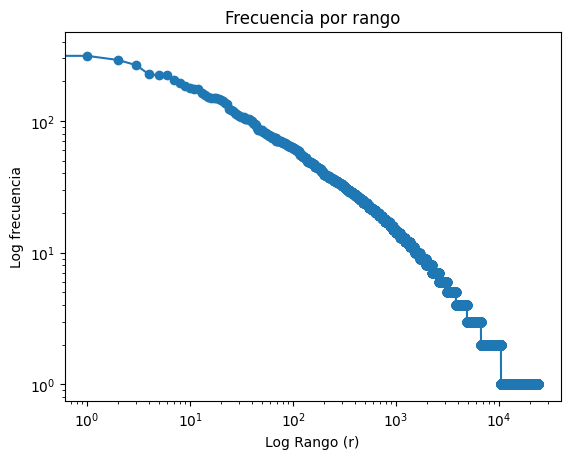

In [6]:
fig, ax = plt.subplots()
graficar_frecuencias(tabla_frecuencias, ax, log_scale=True)
plt.show()

## Paso 5
Dado lo anterior, utilizamos nuestro corpus y el metodo de minimos cuadrados para estimar el parámetro $\alpha$ que mejor  aproxime para nuestro corpus.

Dada la estimacion del parámetro alpha, generamos la grafica con los valores de la ley de zipf para cada rango

In [7]:
# Obtenemos alpha
alpha = estimar_param_zipf(tabla_frecuencias)
print(alpha)

0.5817787220326146


In [8]:
# Obtenemos la tabla con los valores de la ley de zipf para cada rango
tabla_zipf = crea_tabla_zipf(alpha, tabla_frecuencias)
tabla_zipf

,Rango,Zipf
0,1,5.877736
1,2,5.474478
2,3,5.238587
3,4,5.071219
4,5,4.941399
...,...,...
23893,23894,0.012602
23894,23895,0.012578
23895,23896,0.012553
23896,23897,0.012529


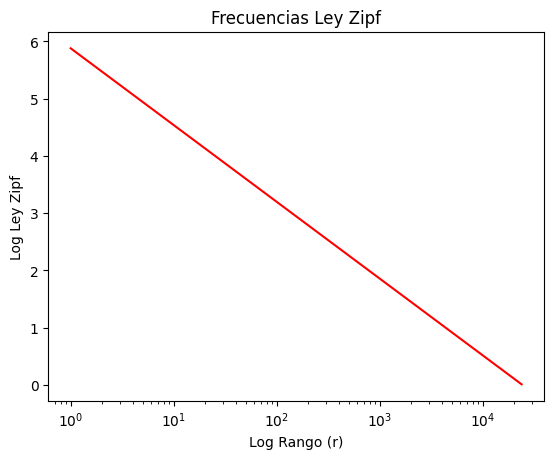

In [9]:
fig, ax = plt.subplots()
graficar_ley_zipf(tabla_zipf, ax)
plt.show()

## Paso 6

Realizamos una comparacion entre las frecuencias de cada rango y su valor dado por Zipf

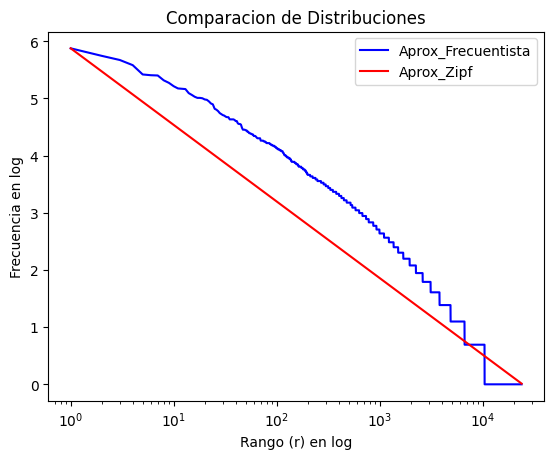

In [10]:
## Graficamos la comparacion
fig, ax = plt.subplots()
#tabla_frecuencias['frecuencia'] = tabla_frecuencias['frecuencia'].apply(np.log)
graficar_zipf_frec(tabla_zipf, tabla_frecuencias, ax)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Paso 7

Utilizamos el metodo de __Byte Pair Encoding__ (BPE) para obtener los subwords de nuestros tokens. Dado esto, obtenemos las frecuencias de los nuevos tokens, en este caso, serian las frecuencias de los subwords generados por BPE

In [11]:
# Obtenemos las frecuencias de los tipos de cada subword utilizando bpe
bpe_tokens = aplicar_byte_pair_encoding(tokens_normalizados, 500)

In [12]:
# Observamos la nueva cantidad de tipos que tenemos
print(len(bpe_tokens))

9872


In [13]:
tabla_frecuencias_bpe = crear_tabla_frecuencias(bpe_tokens)
print(tabla_frecuencias_bpe)

       palabra  frecuencia
0            a        2253
1            o        2096
2           de        2036
3           co        1816
4           to        1574
...        ...         ...
9867    atones           1
9868     zaria           1
9869    demoni           1
9870  tosiendo           1
9871    velaba           1

[9872 rows x 2 columns]


## Paso 8
Graficamos las frecuencias de los tokens generados con BPE

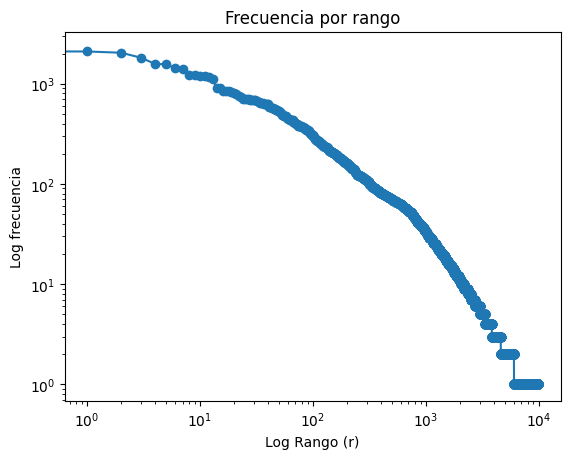

In [14]:
fig, ax = plt.subplots()
graficar_frecuencias(tabla_frecuencias_bpe, ax, log_scale=True)
plt.show()

## Paso 9

Obtenemos el parametro alpha de la distribucion de zipf para nuestro tokens con BPE. Graficamos la distribucion

In [15]:
# Obtenemos alpha
alpha_bpe = estimar_param_zipf(tabla_frecuencias_bpe)
print(alpha_bpe)


0.7964994762561344


In [16]:

# Obtenemos la tabla con los valores de la ley de zipf para cada rango
tabla_zipf_bpe = crea_tabla_zipf(alpha_bpe, tabla_frecuencias_bpe)
tabla_zipf

,Rango,Zipf
0,1,5.877736
1,2,5.474478
2,3,5.238587
3,4,5.071219
4,5,4.941399
...,...,...
23893,23894,0.012602
23894,23895,0.012578
23895,23896,0.012553
23896,23897,0.012529


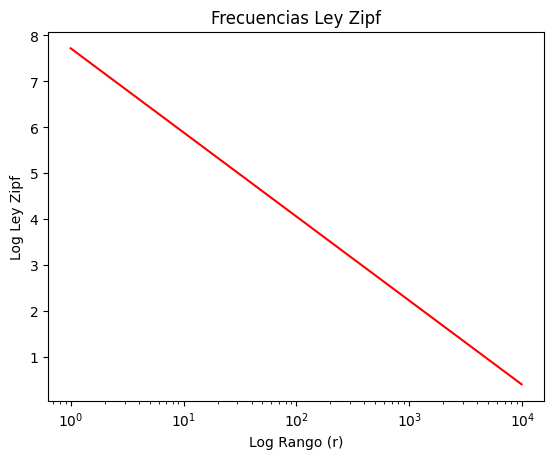

In [17]:
fig, ax = plt.subplots()
graficar_ley_zipf(tabla_zipf_bpe, ax)
plt.show()

## Paso 10

Comparamos las frecuencias con el valor de la ley de zipf

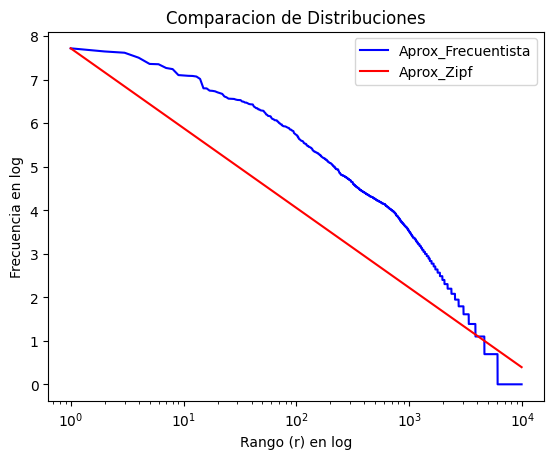

In [18]:
## Graficamos la comparacion
fig, ax = plt.subplots()
graficar_zipf_frec(tabla_zipf_bpe, tabla_frecuencias_bpe, ax)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()